# TP1: Organizacion de datos

Here is a part of our work about the data from Trodaphone. This part focused on the sales of Trodafone. There are three parts, one that analyze the sales regarding model, color and other attributes. Another one is about the linear regression in order to predict the future sales. The last one is about the lead of Trodafone. Each part has his goal: the first one to know which parameters should Trodafone focused on for its future models. The second one is about predicting the sales in order to have a previsionnal budget, stocks. The third is about ameliorating the stocks. Indeed Trodafone could lose money and customers because of stock's issues that could be improved by regarding the data.

## I / Manipulation and presentation of the data

In [152]:
### Import the librairies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
### Read the csv
df = pd.read_csv(r'C:/Users/hugol/Downloads/tp1/events.csv', dtype = {'sku': str})
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')

In [154]:
### Show how the data looks like
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
### Resume of the datas

df.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611
first,2018-01-01 07:32:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-06-15 23:59:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
### Show the different types of events

df['event'].unique()

array(['ad campaign hit', 'visited site', 'viewed product', 'checkout',
       'generic listing', 'search engine hit', 'brand listing',
       'searched products', 'conversion', 'staticpage', 'lead'],
      dtype=object)

In [157]:
## Show the number of each event

df.groupby('event').count()

,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
event,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,82827,82827,82756,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brand listing,98635,98635,0,0,0,0,0,0,98324,0,...,0,0,0,0,0,0,0,0,0,0
checkout,33735,33735,0,33735,33733,33733,33733,33733,0,0,...,0,0,0,0,0,0,0,0,0,0
conversion,1172,1172,0,1172,1172,1172,1172,1172,0,0,...,0,0,0,0,0,0,0,0,0,0
generic listing,67534,67534,0,0,0,0,0,0,67421,0,...,0,0,0,0,0,0,0,0,0,0
lead,448,448,0,0,448,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
search engine hit,50957,50957,0,0,0,0,0,0,0,0,...,50957,0,0,0,0,0,0,0,0,0
searched products,56073,56073,0,0,0,0,0,0,55954,48967,...,0,0,0,0,0,0,0,0,0,0
staticpage,3598,3598,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analisis of the conversion event

### Determine the model the most sold

In [158]:
### Create a dataframe for the event conversion only

df_conversion = df[df['event'] == 'conversion']

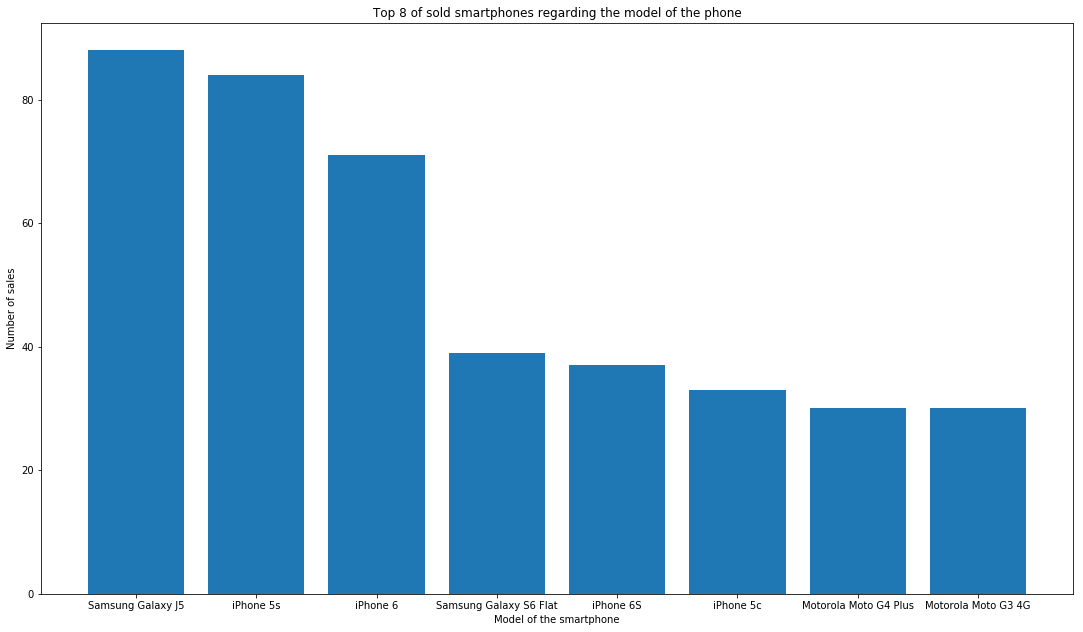

In [159]:
### Show the most sold smartphones

conversion_models = df_conversion.groupby('model').count().sort_values(by= 'timestamp', ascending=False).head(8)


X = conversion_models.index.tolist()
Y = conversion_models['timestamp'].tolist()

plt.bar(X, Y)
plt.title('Top 8 of sold smartphones regarding the model of the phone')
plt.xlabel('Model of the smartphone')
plt.ylabel('Number of sales')
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

<div class = 'alert alert-warning'> As we can see three models are much more sold than the others. Thus Trodafone should focus on these models. However I believe that in the next months it will be Samsung S6 and iPhone6 the most sold because it is the last models released by the two mastodontes Apple and Samsung.  </div>

### Determine the condition repartition on the phones sold

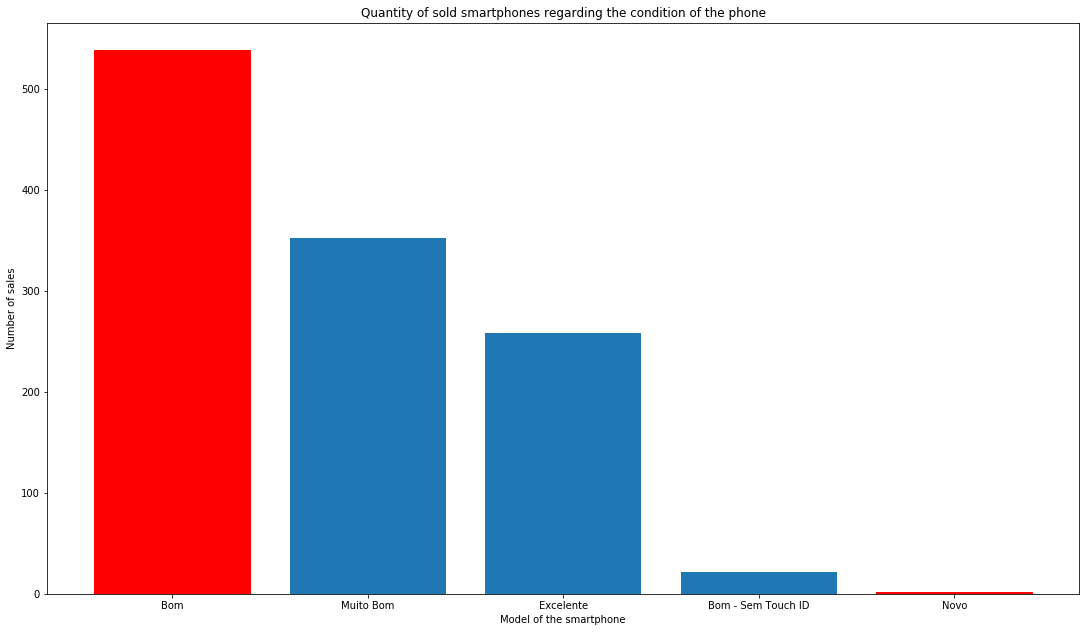

In [160]:
##Repartition of the condition of the phones sold

conversion_condition = df_conversion.groupby('condition').count().sort_values(by='timestamp', ascending=False)

X = conversion_condition.index.tolist()
Y = conversion_condition['timestamp'].tolist()

bar_list = plt.bar(X, Y)
plt.title('Quantity of sold smartphones regarding the condition of the phone')
plt.xlabel('Model of the smartphone')
plt.ylabel('Number of sales')
bar_list[0].set_color('r')
bar_list[4].set_color('r')
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

<div class = 'div alert alert-warning'> People almost never bought new smartphones which is obvious because Trodafone is a second-handed market. They prefer largely the smartphone in good condition but also excellent and half good. We do not have information about the prices but I guess it is the best trade-off between the quality and price for them.  </div>

### Determine the storage repartition on the phones sold

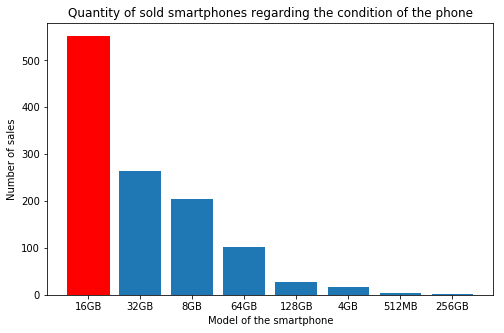

In [161]:
conversion_storage = df_conversion.groupby('storage').count().sort_values(by='timestamp', ascending=False)

X = conversion_storage.index.tolist()
Y = conversion_storage['timestamp'].tolist()

bar_list = plt.bar(X, Y)
plt.title('Quantity of sold smartphones regarding the condition of the phone')
plt.xlabel('Model of the smartphone')
plt.ylabel('Number of sales')
bar_list[0].set_color('r')

plt.gcf().set_size_inches(8, 5)
plt.show()

<div class="alert alert-warning"> 16Gb is the most popular storage by far: more than twice the second one. The other popular models are surrounding the 16 Gb: 8Gb and 32Gb. 64 and 128 is a bit too much for the use of customers and I guess the price is more expensive. The others are definitely too low, customers cannot do anything with 4Gb or less. </div>

### Determine the color repartition on the phones sold

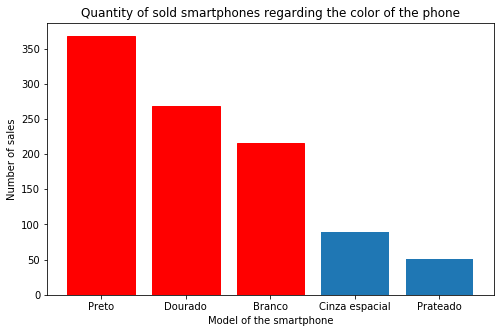

In [162]:
conversion_color = df_conversion.groupby('color').count().sort_values(by='timestamp', ascending=False).head(5)

X = conversion_color.index.tolist()
Y = conversion_color['timestamp'].tolist()

bar_list = plt.bar(X, Y)
plt.title('Quantity of sold smartphones regarding the color of the phone')
plt.xlabel('Model of the smartphone')
plt.ylabel('Number of sales')
bar_list[0].set_color('r')
bar_list[1].set_color('r')
bar_list[2].set_color('r')

plt.gcf().set_size_inches(8, 5)
plt.show()

<div class = 'alert alert-warning'> Concentrate the sells and advertising on Preto, Dourado, Branco. These are the most popular colors. </div>

<div class = 'alert alert-warning'> In conclusion, Trodafone should focused on phones with these characteristics: Samsung J5, iPhone 5 and in generale smartphones of Apple or Samsung, in a good condition, with 16Gb, dorado, preto or branco.
    </div>

### Print the repartition of the conversion over the date

In [163]:
### Sort the data base over the timestamp
df_conversion2 = df_conversion.sort_values(by='timestamp')

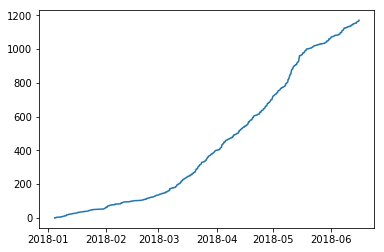

In [164]:
### Evolution of the sales during the half-year, we can do with different model of phones or with different types of event

plt.plot(df_conversion2['timestamp'], [i for i in range(len(df_conversion2['timestamp']))])
plt.show()

## Linear regression to predict the future sales of the year

In [165]:
#Create a copy of the dataframe conversion
df_copy = df_conversion

#Gather the conversion by date, we do not really care about the hour
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp']).apply(lambda x: x.date())

#Create a new dataframe with a column counts which counts the number of sales in one day
df_plt = df_copy.groupby('timestamp').size().reset_index(name='counts')

#Sum up the number of sales over the days
counts = df_plt['counts'].values
counts_cumule = [counts[0]]
for i in range(1, len(counts)):
    counts_cumule.append(counts[i] + counts_cumule[i-1])

C:\Users\hugol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [166]:
# Linear regression over the number of sales

#Create a new array which contains the day of the year from one day after the first sale to the last one with data of sales
#I put the day 0 which is the day before the first sale because I want to put the intercept to 0 for the linear regression
X2 = np.array([[i] for i in range(155)])

# I have to add 0 for the day 0
Y2 = [0] + counts_cumule


lr = linear_model.LinearRegression(fit_intercept=False)
lr2 = lr.fit(X2,Y2)

#Create all the days of the year
X4 = np.array([[i] for i in range(366)])
Y4 = np.array([[i*lr.coef_[0]] for i in range(366)])

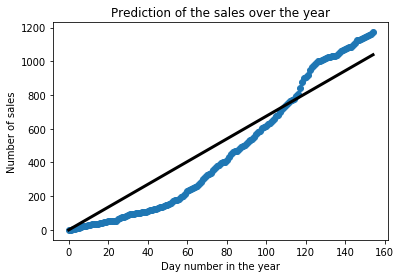

In [167]:
#Plot the linear regression only on the known perdiod
plt.scatter(X2, Y2)
plt.plot(X2, lr.predict(X2), color='black', linewidth=3)

plt.title("Prediction of the sales over the year")
plt.xlabel('Day number in the year')
plt.ylabel('Number of sales')
plt.show()

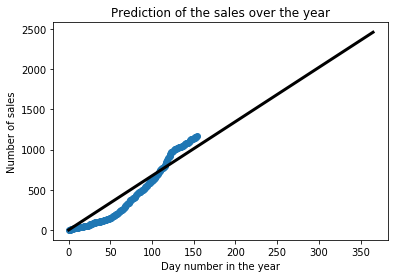

Estimated number of product sales over the year: 2461


In [168]:
plt.scatter(X2, Y2)
plt.plot(X4, Y4, color='black', linewidth=3)

plt.title("Prediction of the sales over the year")
plt.xlabel('Day number in the year')
plt.ylabel('Number of sales')
plt.show()

print('Estimated number of product sales over the year:', int(Y4[-1][0]))

<div class = 'alert alert-warning'> Based on the sales of the first half of the year we can predict the sales at the end of the year. 
It a simple model and not perfect. Indeed we assume here that the sales follow a linear model which is not the truth. It gives an insight of what the sales will look like at the end of the year, with a supposed 2500 sales. 
To go further we could do a linear regression for each model of phones. Thus we could skip better the lead. However we believe the dataset is a bit small to do it for model (the majority of it have less than 30 sales).
</div>

## Analyse of the lead

In [169]:
#Creation of the dataframe with only the event 'lead'
df_lead = df[df['event'] == 'lead']
df_lead_model = df_lead['model'].unique().tolist()

### Create a function that return the lead/conversion rate of the model

In [170]:
def lead_over_conversion(model1):  #model is a string
    number_sold3 = df_conversion['timestamp'][df_conversion['model'] == model1 ].count()
    number_lead3 = df_lead['timestamp'][df_lead['model'] == model1 ].count()
    if number_sold3 != 0:
        return [model1, number_lead3, number_lead3/number_sold3]  
        ### the 1 is for indicating that number_sold3 is different from 0
    else:
        return [model1, number_lead3, -1] 
        ### the 0 is for indicating that number_sold3 is equal to 0

In [171]:
#Apply the function to all the models
lead_over_conversion_list = []
lead_only = []

for model_phone in df_lead_model:
    lead_only.append(lead_over_conversion(model_phone)[0:2])
    if lead_over_conversion(model_phone)[2] != -1:
        lead_over_conversion_list.append(lead_over_conversion(model_phone))        

### Plot the lead over conversion rate

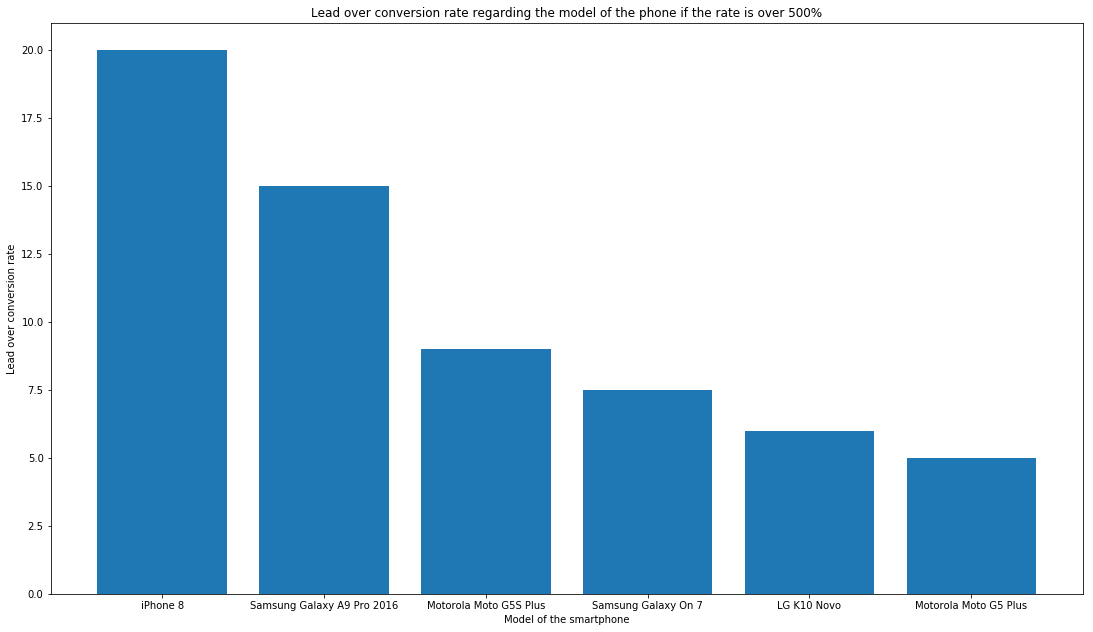

In [172]:
#Create a list with the smartphonew with a lead/conversion over 5 (500%)
lead_over_conversion_list_over5 = []

for i in range(len(lead_over_conversion_list)):
               if lead_over_conversion_list[i][2] >= 5:
                   lead_over_conversion_list_over5.append(lead_over_conversion_list[i])
lead_over_conversion_list_over5.sort(key=lambda x: x[2], reverse=True)

#Plot the results

X = [lead_over_conversion_list_over5[i][0] for i in range(len(lead_over_conversion_list_over5))]
Y = [lead_over_conversion_list_over5[i][2] for i in range(len(lead_over_conversion_list_over5))]
plt.bar(X, Y)

plt.title('Lead over conversion rate regarding the model of the phone if the rate is over 500%')
plt.xlabel('Model of the smartphone')
plt.ylabel('Lead over conversion rate')
plt.gcf().set_size_inches(18.5, 10.5)  #Increase the size of the window plot

plt.show()

<div class = 'alert alert-warning'> For these smartphones the lead over conversion rate is enormous, more than 500% for each of them. Trodafone has lost a lot of conversion because of it and thus a lot of money. They should intend to have more stocks of these smartphones for the future.
</div>

### Plot the number of lead regarding the smartphone

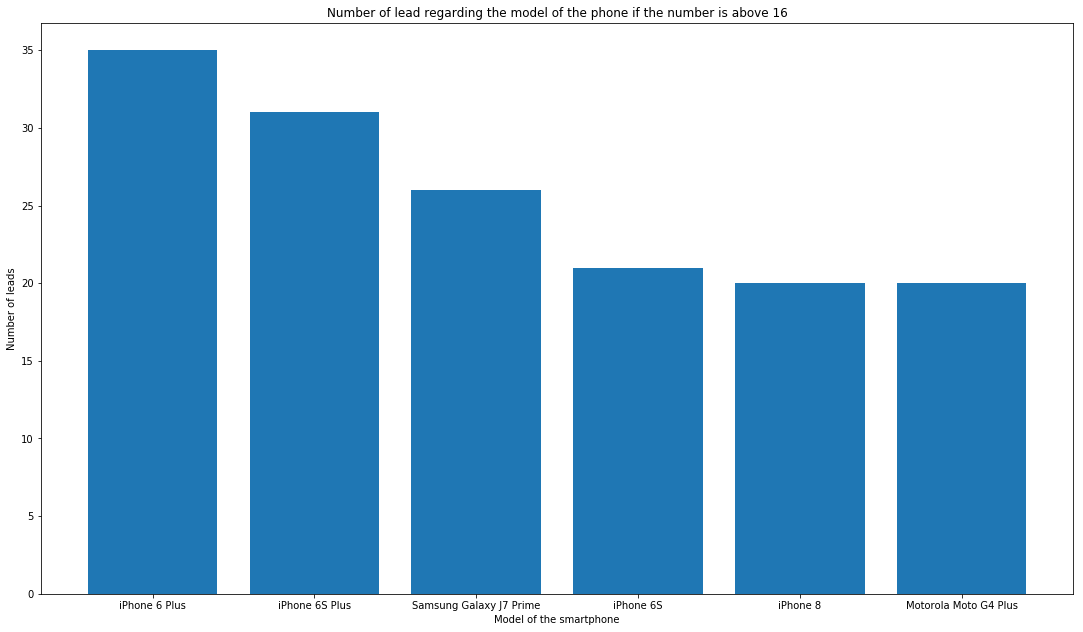

In [173]:
#Create a list with the smartphonew with a number of lead over 16
lead_only_over16 = []

for i in range(len(lead_only)):
               if lead_only[i][1] >= 16:
                   lead_only_over16.append(lead_only[i])
lead_only_over16.sort(key=lambda x: x[1], reverse=True)

X = [lead_only_over16[i][0] for i in range(len(lead_only_over16))]
Y = [lead_only_over16[i][1] for i in range(len(lead_only_over16))]

plt.bar(X, Y)
plt.title('Number of lead regarding the model of the phone if the number is above 16')
plt.xlabel('Model of the smartphone')
plt.ylabel('Number of leads')
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

<div class = 'alert alert-warning'> For these smartphones the number of lead is above 15 which is a lot of money lost. As for the precedent category, Trodafone should focus on having more stocks of these smartphones.
</div>